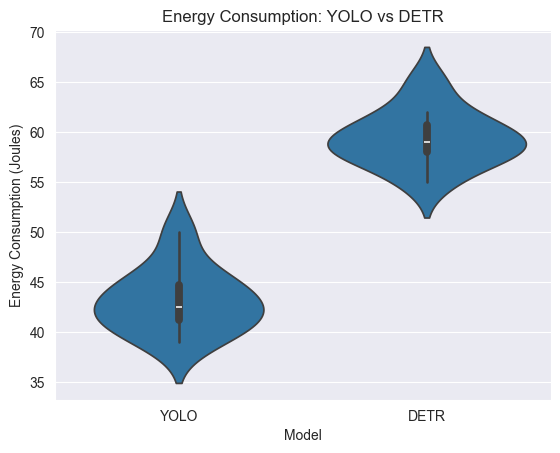

In [2]:
# uncomment + run if they aren't installed already
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# df_yolo = pd.read_csv("data/yolo.csv")
# df_detr = pd.read_csv("data/detr.csv")

# Temporary for testing
df_yolo = pd.DataFrame([42, 45, 39, 44, 50, 41, 43, 46, 40, 42])
df_detr = pd.DataFrame([55, 62, 58, 59, 65, 57, 60, 58, 61, 59])

labels = ['YOLO', 'DETR']

data = pd.DataFrame({
    'Energy': np.concatenate([df_yolo.values.flatten(), df_detr.values.flatten()]),
    'Model': ['YOLO']*len(df_yolo) + ['DETR']*len(df_detr)
})

# Violin + Box plots
sns.violinplot(data=data, x='Model', y='Energy', inner='box')
plt.xticks(ticks=[0, 1], labels=labels)
plt.ylabel('Energy Consumption (Joules)')
plt.title('Energy Consumption: YOLO vs DETR')

plt.show()

In [23]:
# !pip install scipy

from scipy.stats import ttest_ind, shapiro, mannwhitneyu

# if data is not normal (see the violin plots), then we need other tests / procedures

# Shapiro-Wilk test (testing normality)
shap_yolo = shapiro(df_yolo.values)
shap_detr = shapiro(df_detr.values)

# Statistical significance tests depending on normality
if shap_yolo.pvalue < 0.05 or shap_detr.pvalue < 0.05:
    print("Some dataset is NOT normally distributed.")
    
    # Statistical significance test
    print('Statistical significance test')
    mwu = mannwhitneyu(df_yolo.values, df_detr.values)
    print(f'\tMann-Whitney U test: {mwu:.2f}')
    
    print('Effect size analysis')
    
    median_yolo = np.median(df_yolo.values)
    median_detr = np.median(df_detr.values)
    median_difference = median_yolo - median_detr
    
    cles = mwu / (len(df_yolo.values) * len(df_detr.values))
    
    print(f'Median difference: {median_difference:.2f}')
    print(f'Common language effect size: {cles:.2f}')

else:    
    print("Normal distribution can be assumed.")
    
    # Statistical significance test (Welch's t-test)
    _,welch_pvalue = ttest_ind(
        df_yolo.values, df_detr.values, equal_var=False, alternative='two-sided')
    
    print('\nStatistical significance test')
    if welch_pvalue < 0.05:
        print(f'\tP-value is significant ({welch_pvalue[0]})')
    else:
        print(f'\tP-value is not significant ({welch_pvalue[0]})')
        
    print('\nEffect size analysis')
    
    # using "raw" difference to retain more information
    mean_diff = df_yolo.values.mean() - df_detr.values.mean()
    percentage_change = (mean_diff / df_yolo.values.mean()) * 100
    cohen_d = mean_diff / (0.5 * np.sqrt(np.square(df_yolo.values.std()) + np.square(df_detr.values.std())))
    
    print(f'\tMean difference: {mean_diff:.2f}')
    print(f'\tPercentage change: {percentage_change:.2f}')
    print(f'\tCohen\'s Difference: {cohen_d:.2f}')

Normal distribution can be assumed.

Statistical significance test
	P-value is significant (6.413718167886877e-10)

Effect size analysis
	Mean difference: -16.20
	Percentage change: -37.50
	Cohen's Difference: -8.00


In [ ]:
# Nvidia GPU label: GPU0_POWER (mWatts)

# WIP
# power_vals_yolo = []
# power_vals_detr = []
# 
# y_cpu = df_yolo['CPU_ENERGY (J)'].values
# y_time = df_yolo['Time'].values
# d_cpu = df_detr['CPU_ENERGY (J)'].values
# d_time = df_detr['Time'].values
# 
# # if len(a_cpu) == len(u_cpu):
# for e_yi, e_yj, t_yi, t_yj, e_di, e_dj, t_di, t_dj in zip(
#     y_cpu[:-1], y_cpu[1:], y_time[:-1], y_time[1:],
#     d_cpu[:-1], d_cpu[1:], d_time[:-1], d_time[1:],
#     strict=True
# ):
#     power_vals_yolo.append((e_yj - e_yi) / (t_yj - t_yi))
#     power_vals_detr.append((e_dj - e_di) / (t_dj - t_di))
# 
# plt.plot(df_yolo['Time'][1:] / 1000, power_vals_yolo, label='YOLO')
# plt.plot(df_detr['Time'][1:] / 1000, power_vals_detr, label='DETR')
# 
# plt.xlabel('Time (s)')
# plt.ylabel('CPU Power (Watts)')
# plt.title('CPU Power over Time')
# plt.legend()
# plt.grid()
# plt.show()